In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Datos

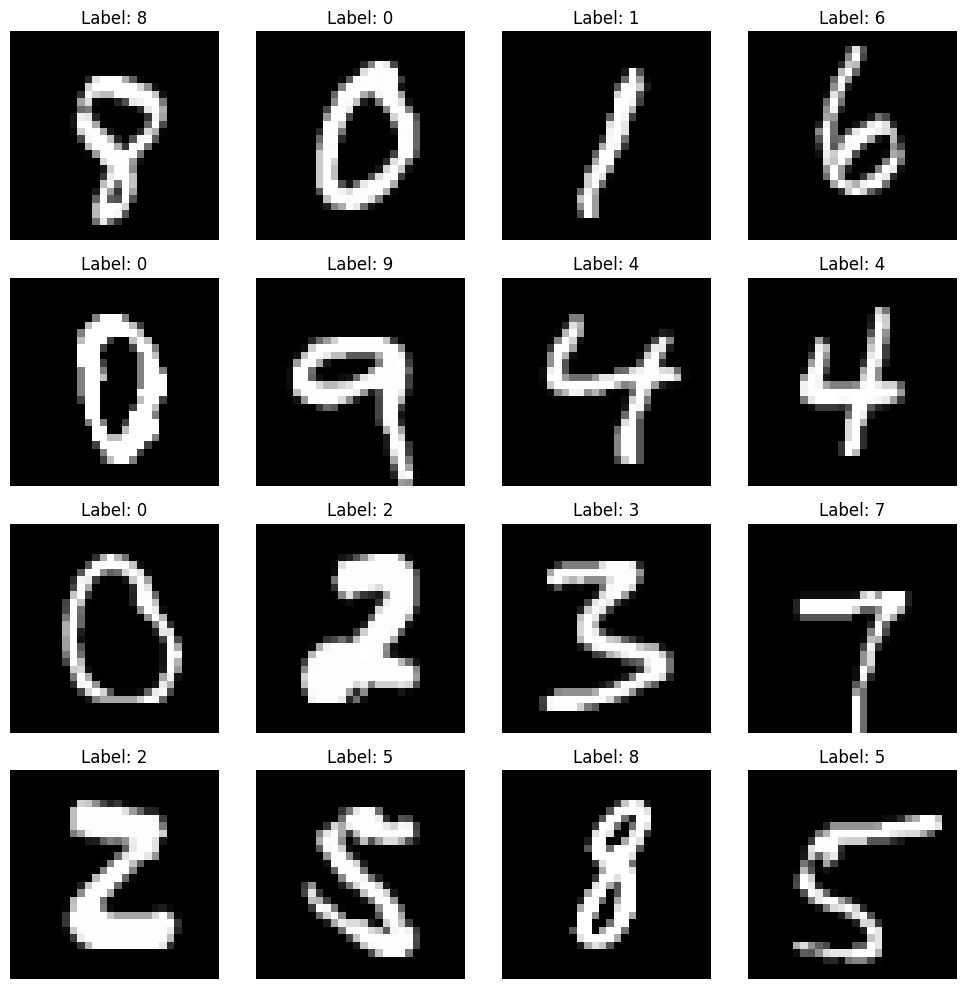

In [3]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [8]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 500)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(500, 250)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc3 = nn.Linear(250, 100)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(100, 20)
        # Función de activación Lineal
        self.Relu = nn.ReLU()
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.Relu(self.fc1(x))  # Aplicamos la primera capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.Relu(self.fc2(x))  # Aplicamos la segunda capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.Relu(self.fc3(x))  # Aplicamos la tercera capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc4(x)             # Aplicamos la capa de salida
        return x

# Entrenamiento

In [39]:
# Hiperparámetros
batch_size = 60      # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 25          # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/35], Pérdida: 0.2711
Época [2/35], Pérdida: 0.1410
Época [3/35], Pérdida: 0.0249
Época [4/35], Pérdida: 0.1211
Época [5/35], Pérdida: 0.0989
Época [6/35], Pérdida: 0.1265
Época [7/35], Pérdida: 0.0714
Época [8/35], Pérdida: 0.0311
Época [9/35], Pérdida: 0.2450
Época [10/35], Pérdida: 0.2996
Época [11/35], Pérdida: 0.1056
Época [12/35], Pérdida: 0.1704
Época [13/35], Pérdida: 0.1496
Época [14/35], Pérdida: 0.1435
Época [15/35], Pérdida: 0.0911
Época [16/35], Pérdida: 0.0024
Época [17/35], Pérdida: 0.1172
Época [18/35], Pérdida: 0.0634
Época [19/35], Pérdida: 0.0969
Época [20/35], Pérdida: 0.0885
Época [21/35], Pérdida: 0.0212
Época [22/35], Pérdida: 0.0617
Época [23/35], Pérdida: 0.2863
Época [24/35], Pérdida: 0.0551
Época [25/35], Pérdida: 0.0170
Época [26/35], Pérdida: 0.0460
Época [27/35], Pérdida: 0.0191
Época [28/35], Pérdida: 0.0537
Época [29/35], Pérdida: 0.0170
Época [30/35], Pérdida: 0.0671
Época [31/35], Pérdida: 0.0459
Época [32/35], Pérdida: 0.1565
Época [33/35], Pé

# Evaluación del modelo

In [40]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 98.27%


Informe de modificaciones de la arquitectura: 
1. Modificación de número de neuronas: Primera capa se cambio a (28*28, 500), en la segunda (500,250) y en la tercera (250,50) lo que efectuó un aumento del accuracy en la evaluación del modelo de 97.37% a 97.49%.
2. Se agregó una tercera capa oculta, dejando la secuencia siguiente: fc1 (28*28, 500), fc2 (500, 250), fc3(250, 100) y fc4 (100,20). Esta modificación también genero mejoras en accuracy de un 07.49% a un 97.82%.
3. Se modifica la función de activación a Tahn, lo cual disminuye el accuracy de 97.82% a 96.19%. A continuación se probó modificando con la función sigmoide lo cual mejoró el accuracy mencionado anteriormente de 96.19% a 97.59%. Dado que Relu sostuvo un mayor rendimiento en términos de accuracy (97.82%), se decidió mantener esa función de activación.

Informe de modificaciones del entrenamiento: 
1. Se cambio el algoritmo de optimización de Adam a Adagrad, lo cual redujo el accuracy de 97.82% a 93.83%. Luego de modificó a RMSprop, donde aumentó a 97.41%. Se prueba posteriormente con AdamW con lo que sube a 97.74%, con NAdam bajó a 97.46%. Se decidió mantener el algoritmo de Adam dado al mejor valor porcentual (97.82%).
2. Se probó cambiar la tasa de aprendizaje a 0.0001, sin embargo el accuracy bajó de 97.82% a 97.54%. Modificandolo a 0.005 reduce notoriamente a 94.36%. Modificandolo a 0.008 indica un 97.65%. Se decide mantener la tasa de aprendizaje inicial por no identificar una tasa que condicione a un porcentaje de accuracy mayor.
3. Aumentando el lote a 160 el accuracy se reduce a un 97.34%, al reducirlo a 100 se visualiza un 97.69%. Se redujo a 45 el porcentaje osilo entre 97.45% y 97.52%. En este punto a pesar de mantener sin modificación los ajustes previos no se logró alcanzar el 97.82% en accuracy, aún con un lote de 60; de todas formas se decidió devovler al valor original.
4. Se incrementaron las epocas hasta 20, lo que permitió alcanzar un accuracy de 97.91%. Luego al aumentarlo a 25 sube considerablemente hasta 98.31%. Luego al aumentar el lote a 35, se reduce a un 98.27%. Por ello, se decide conservar en 25 de batch size, a expensas del aumento de tiempo en el procesamiento que esto conlleva.



In [45]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, verbose=False, filters_l1=50, filters_l2=84, dropout=0.2, final_layer_size=128):
        super(CNN, self).__init__()
        self.verbose = verbose
        self.filters_l1 = filters_l1
        self.filters_l2 = filters_l2
        self.dropout_rate = dropout
        self.final_layer_size = final_layer_size

        # Primera capa convolucional
        self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)

        # Calcular automáticamente las dimensiones de la capa lineal (fc1)
        self.fc1_input_size = self._calculate_fc1_input_size()
        
        # Primera capa completamente conectada
        self.fc1 = nn.Linear(self.fc1_input_size, self.final_layer_size)
        self.dropout = nn.Dropout(self.dropout_rate)
        self.fc2 = nn.Linear(self.final_layer_size, 10)  # Capa de salida para 10 clases (MNIST)

    def _calculate_fc1_input_size(self):
        """
        Calcula automáticamente el tamaño de la entrada para la primera capa completamente conectada (fc1).
        Simula una pasada con una imagen de prueba de tamaño (1, 28, 28).
        """
        with torch.no_grad():  # Desactiva gradientes
            x = torch.randn(1, 1, 28, 28)  # Tensor ficticio de entrada con tamaño MNIST (batch_size=1)
            x = self.pool(torch.relu(self.conv1(x)))  # Aplicar Conv1 -> Pool
            x = self.pool(torch.relu(self.conv2(x)))  # Aplicar Conv2 -> Pool
            fc1_input_size = x.numel()  # Calcular número total de elementos
        return fc1_input_size

    def forward(self, x):
        if self.verbose: 
            print(f"Entrada: {x.shape}")  # Imprime la dimensión de la entrada

        # Primera capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        if self.verbose:
            print(f"Después de Conv1 y MaxPooling: {x.shape}")  # Dimensión después de Conv1 y Pool

        # Segunda capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv2(x)))
        if self.verbose:
            print(f"Después de Conv2 y MaxPooling: {x.shape}")  # Dimensión después de Conv2 y Pool

        # Aplanar las características 2D a 1D
        x = x.view(-1, self.fc1_input_size)
        if self.verbose:
            print(f"Después de Aplanamiento: {x.shape}")  # Dimensión después de Flatten

        # Primera capa completamente conectada
        x = torch.relu(self.fc1(x))
        if self.verbose:
            print(f"Después de Fully Connected (fc1): {x.shape}")  # Dimensión después de fc1

        # Aplicar Dropout
        x = self.dropout(x)
        if self.verbose:
            print(f"Después de Dropout: {x.shape}")  # Dimensión después de Dropout

        # Capa de salida
        x = self.fc2(x)
        if self.verbose:
            print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 (salida final)

        return x



In [48]:
# Inicializar el modelo, la función de pérdida y el optimizador
model = CNN(verbose=False, filters_l1=12, filters_l2=24, dropout=0.4, final_layer_size=200).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.0009) # Optimizador Adam con tasa de aprendizaje 0.001

# Definir la función de entrenamiento
def train(model, loader, criterion, optimizer, device):
    model.train()  # Establecer el modelo en modo de entrenamiento
    running_loss = 0.0
    for images, labels in loader:  # Iterar sobre los lotes de datos
        images, labels = images.to(device), labels.to(device)  # Mover los datos a la GPU/CPU

        optimizer.zero_grad()       # Reiniciar los gradientes
        outputs = model(images)     # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()             # Paso hacia atrás (cálculo de gradientes)
        optimizer.step()            # Actualizar los pesos

        running_loss += loss.item()  # Acumular la pérdida
    return running_loss / len(loader)  # Devolver la pérdida promedio

# Definir la función de evaluación
def evaluate(model, loader, device):
    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes para ahorrar memoria
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU
            outputs = model(images)  # Paso hacia adelante
            _, predicted = torch.max(outputs, 1)  # Obtener las predicciones (clase con mayor probabilidad)
            total += labels.size(0)  # Contar el número total de ejemplos
            correct += (predicted == labels).sum().item()  # Contar las predicciones correctas
    return correct / total  # Calcular la precisión

# Bucle principal de entrenamiento
num_epochs = 25  # Número de épocas
for epoch in range(num_epochs):
    # Entrenar el modelo y calcular la pérdida
    train_loss = train(model, train_loader, criterion, optimizer, device)
    # Evaluar el modelo en el conjunto de prueba
    test_accuracy = evaluate(model, test_loader, device)
    # Imprimir los resultados de la época actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calcular la precisión final en el conjunto de prueba
final_accuracy = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Epoch [1/25], Loss: 0.3416, Test Accuracy: 0.9763
Epoch [2/25], Loss: 0.0859, Test Accuracy: 0.9856
Epoch [3/25], Loss: 0.0616, Test Accuracy: 0.9871
Epoch [4/25], Loss: 0.0492, Test Accuracy: 0.9895
Epoch [5/25], Loss: 0.0431, Test Accuracy: 0.9894
Epoch [6/25], Loss: 0.0370, Test Accuracy: 0.9901
Epoch [7/25], Loss: 0.0328, Test Accuracy: 0.9915
Epoch [8/25], Loss: 0.0291, Test Accuracy: 0.9914
Epoch [9/25], Loss: 0.0261, Test Accuracy: 0.9930
Epoch [10/25], Loss: 0.0223, Test Accuracy: 0.9910
Epoch [11/25], Loss: 0.0221, Test Accuracy: 0.9927
Epoch [12/25], Loss: 0.0194, Test Accuracy: 0.9923
Epoch [13/25], Loss: 0.0180, Test Accuracy: 0.9933
Epoch [14/25], Loss: 0.0168, Test Accuracy: 0.9932
Epoch [15/25], Loss: 0.0150, Test Accuracy: 0.9924
Epoch [16/25], Loss: 0.0144, Test Accuracy: 0.9911
Epoch [17/25], Loss: 0.0131, Test Accuracy: 0.9926
Epoch [18/25], Loss: 0.0122, Test Accuracy: 0.9925
Epoch [19/25], Loss: 0.0110, Test Accuracy: 0.9922
Epoch [20/25], Loss: 0.0107, Test Accura

Informe de modificaciones de la arquitectura: 
1. Iniciando con un valor final de accuracy de 99%, se repitió el proceso anterior aplicado al modelo multicapa donde se modificaron los parámetros en orden (cantidad de filtros, tasa de dropout y tamaño de la capa final), para finalmente seleccionar el mejor valor de accuracy de estos intentos obtenidos. 
2. La modificación final consistió en aumentar los filtros de la primera y la segunda capa en 12 y 24 respectivamente, aumentar el dropout a 0.4 y la capa final a 200. Esto generó un valor de accuracy de 99.2%. 


Informe de modificaciones del entrenamiento: 
1. Iniciando con un valor final de accuracy de 99%, se repitió el proceso anterior aplicado al modelo multicapa donde se modificaron los parámetros en orden (algoritmo de optimización, tasa de aprendizaje y número de épocas), para finalmente seleccionar el mejor valor de accuracy de estos intentos obtenidos. 
2. Después de la experimentación, se mantuvo el algorítmo, sin embargo se modificó el numero de épocas a 25 y la tasa de aprendizaje a 0.0009. Esto dejó un valor de accuracy de 99.23%, el cual siguió superando al valor inicial, sin distanciarse demasiado al de las modificaciones de arquitectura.

En conclusión: 

En ambos modelos se destaca como ciertos componentes, en especifico las funciones de activación y los logaritmos de optimización siguen una tendencia de efectividad resepecto al tipo de muestra, dado a eso en ambos casos se optó por mantenerlos debido sus mejores resultados en términos de accuracy. Se destaca también que a medida que se complejiza más el modelo tanto en tamaño de neuronas, capas y/o épocas se mejora la confiabilidad en las predicciones del modelo; considerando el mayor tiempo de procesamiento que esto implica dado que en ambos experimentos aumento a más del doble. 

